In [1]:
import os

root_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
os.chdir(root_dir)

In [2]:
# import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4)
# sns.set_palette("Set1")
import functions

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [3]:
fungi = pd.read_pickle('results/fungi_for_overall_MCC.pkl.gz')
toxin = pd.read_pickle('results/toxin_for_overall_MCC.pkl.gz')

/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)



Completed!
|██████████████████████████████████████████████████| 100% (98/98)  
Completed!


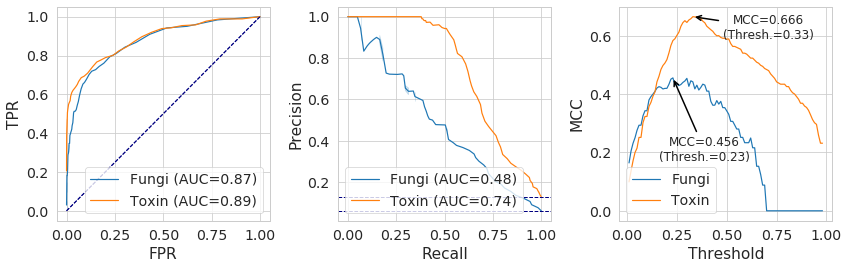

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),)

labels = ['Fungi', 'Toxin']
pos = [(0.4, 0.28), (0.7, 0.85)]

for idx, data in enumerate([fungi, toxin]):


    preds = data['SP_Prediction']
    y = data['Label']

    #Precision, recall
    precision, recall, _ = precision_recall_curve(y, preds, )
    lr_auc = auc(recall, precision)


    #ROC

    fpr, tpr, _ = roc_curve(y, preds)
    roc_auc = auc(fpr, tpr)


    from sklearn.metrics import matthews_corrcoef

    mcc = []

    for i, v in enumerate(np.arange(0.01, 0.99, 0.01)):
        y_pred = [0 if x <= v else 1 for x in preds]
        mcc.append(matthews_corrcoef(y, y_pred))
        functions.progress(i+1, 98)





    sns.lineplot(fpr, tpr, label='{} (AUC={})'.format(labels[idx], round(roc_auc, 2)), ax=ax[0])
    #baseline
    ax[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

    sns.lineplot(recall, precision, label='{} (AUC={})'.format(labels[idx], round(lr_auc, 2)), ax=ax[1])
    #baseline
    baseline = data.Label.value_counts()[1]/data.shape[0]

    ax[1].axhline(y=baseline, color='navy', lw=1, linestyle='--')
    ax[0].set_xlabel('FPR')
    ax[0].set_ylabel('TPR')



    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')


    sns.lineplot(np.arange(0.01, 0.99, 0.01), mcc, \
                 label='{}'.format(labels[idx]), ax=ax[2])
    ax[2].set_xlabel('Threshold')
    ax[2].set_ylabel('MCC')
    
    y = np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)]
    x = max(mcc)
    # plt.axvline(x=np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)])
    ax[2].annotate('MCC=' + str(round(x, 3)) + '\n(Thresh.=' + str(y) + ')',
            xy=(y, x), xycoords='data',
            xytext=pos[idx], textcoords='axes fraction',
            horizontalalignment="center",
            fontsize=12,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                            color='black',
                            lw=1.5),
            )
    

fig.tight_layout()
plt.savefig('figs/Overall_MCC_for_fungi_and_Toxin.pdf', bbox_inches='tight', pad_inches=0);